# The Kernel Trick: Implicit embeddings from inner products

We will talk about kernels in detail later. However, it is important to have an understanding of what the kernel trick actually means and why it is useful for machine learning applications. As previously discussed, linear problems can be solved quite efficiently but most real world data sets (at least the ones that require higher effort) have non-linear dependencies. Thus, one idea would be to find an **embedding**, which linearizes the data. In this context, an embedding is a transformation of the original space (and the data in it) to a latent one. Thus, instead of using a linear model in the original space $\mathbb{R}^{d}$ with weights $\beta \in \mathbb{R}^{d}$ such as

$$ y = x^T \beta \in \mathbb{R} $$

a linear model in the transformed space can be used

$$ y = \phi(x)^T \beta_\phi $$

where $\phi$ is the transformation function and $\beta_\phi \in \mathbb{R}^{m}$. Note that $m$ is the embedding dimension. The constant (or bias) term is omitted for a more concise notation. Such a model is able to represent non-linear dependencies despite having a linear solution, depending on the non-linearity of $\phi$. However, finding a good mapping $\phi$, which linearizes the problem is not trivial. This is where, the kernel trick helps. 

Let us formally define a kernel, an inner product of the transformation functions:

```{admonition} Definition
:class: tip
:name: def:kernel
Let $x_1, x_2 \in \mathbb{R}^{d}$ be two points representing observations in the input space and $\phi: \mathbb{R}^{d} \rightarrow \mathbb{R}^m$ be a map. The map $k: \mathbb{R}^{d} \times \mathbb{R}^{d} \rightarrow \mathbb{R}$ is called the **kernel function**, if the following holds

$$ k(x_1, x_2) = \phi(x_1)^T \phi(x_2) $$ 
```

Please note that it is possible to have a kernel $k$ without knowing the function $\phi$ explicitly. 

We have now defined what a kernel is but it is still not obvious, why or if this is helpful at all. The solution for the linear model was given {ref}```previously in the first Chapter<sec:OLS>``` for $d=1$ and generalizes to

$$ \beta = \big(X^T X\big)^{-1} X^T Y = X^T \big(X X^T \big)^{-1} Y \in \mathbb{R}^d$$

where 

$$X = \begin{pmatrix} x^T_1 \\ x^T_2 \\ \vdots \\ x^T_n \end{pmatrix} \in \mathbb{R}^{n \times d}$$ 

is the matrix of input samples and $Y \in \mathbb{R}^{n}$ the vector of corresponding outputs. Thus, the prediction function can be rewritten as

$$y = x^T X^T \big(X X^T \big)^{-1} Y $$

Similarly, we can denote the solution of $\beta_\phi$ as

$$ \beta_\phi = \phi(X)^T \big(\phi(X) \phi(X)^T \big)^{-1} Y \in \mathbb{R}^m, $$

where 

$$\phi(X) = \begin{pmatrix} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_n)^T \end{pmatrix} \in \mathbb{R}^{n \times m}.$$

Using the definition of the kernel function, it can be seen that

$$ \beta_\phi = \phi(X)^T K(X, X)^{-1} Y $$

where $K = K(X, X) \in \mathbb{R}^{n \times n}$ is the so called **kernel matrix** defined as

$$ K(X, X) = \begin{pmatrix} \phi(x_1)^T\phi(x_1) & \phi(x_1)^T\phi(x_2) & \dots & \phi(x_1)^T\phi(x_n) \\ \phi(x_2)^T\phi(x_1) & \phi(x_2)^T\phi(x_2) & \dots & \phi(x_2)^T\phi(x_n) \\ \vdots & \vdots & \ddots & \vdots \\ \phi(x_n)^T\phi(x_1) & \phi(x_n)^T\phi(x_2) & \dots & \phi(x_n)^T\phi(x_n) \end{pmatrix}$$

We will cover kernels and the kernel matrix more in depth {ref}```later<sec:GPforML>``` but for now, it is important to note that $K$ is a positive semi-definite matrix (see [Mercer's Theorem](https://en.wikipedia.org/wiki/Mercer%27s_theorem) for details). Please note that we implicitly assume that $K$ is even positive definite in order to ensure the existence of its inverse. Rewriting the prediction equation as before yields

$$y = \phi(x)^T \phi(X)^T K(X, X)^{-1} Y = k(x, X) K(X, X)^{-1} Y$$

where $k(x, X) \in \mathbb{R}^{1 \times n}$ denotes the row vector of kernel function values between the prediction point $x$ and the training data $X$. Notice that $K(X, X)^{-1} Y \in \mathbb{R}^n$ is vector of weights for each entry of $k(x, X)$ and the prediction function is a weighted sum of kernel functions. 

```{note}
Using these equations to estimate the weights often results in overfit models, which do not generalize well to unseen data. Practically more relevant approaches mentioned before use different regularization techniques, that aim to choose *simpler* models to improve the generalization.
```

Thus, using a kernel function allows using an implicit definition of $\phi$, which is useful as finding an appropriate $\phi$ is often more difficult than finding an appropriate kernel. But what about our initial motivation of linearizing the problem for an easier solution? This requires a more in depth analysis, which is beyond the scope of this work but the intuition is simple; mapping the low dimensional data to a high dimensional space allows a large number of possible transformations to be eligible. Let us consider a binary classification problem to visualize the idea.

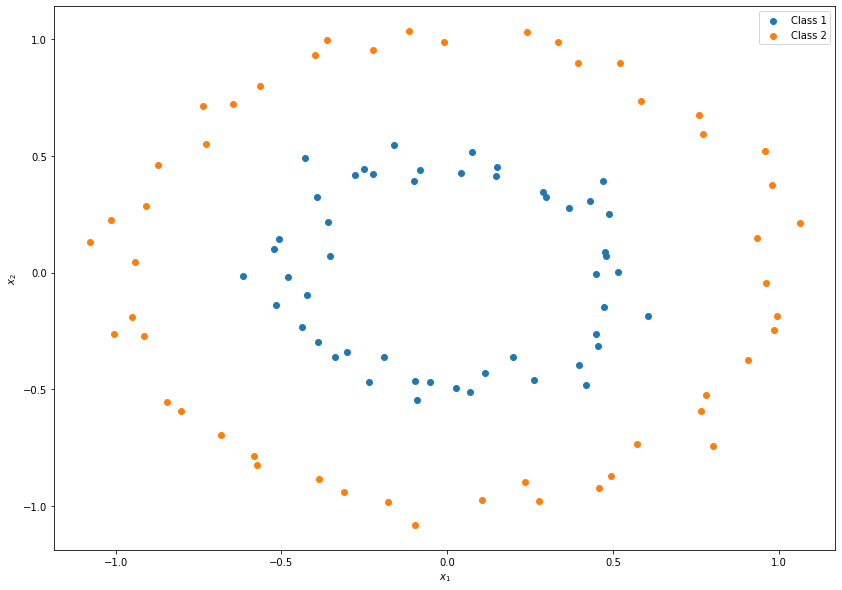

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
np.random.seed(42)

# Create some artificial data
X, y = make_circles(100, noise=.05, factor=0.5)
# create classes
y = y.astype(bool)
not_y = np.logical_not(y)
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(X[y, 0], X[y, 1], label="Class 1")
ax.scatter(X[not_y, 0], X[not_y, 1], label="Class 2")
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
_ = ax.legend()

It can be seen that the decision boundary between the two classes could be represented as a circle but not as a line, which would be easier to estimate. In order to use a linear decision boundary, we can define a  map as follows

$$ \phi^*(x) = (x_1, x_2, x_1^2 + x_2^2) $$

which allows to find a simpler decision boundary.


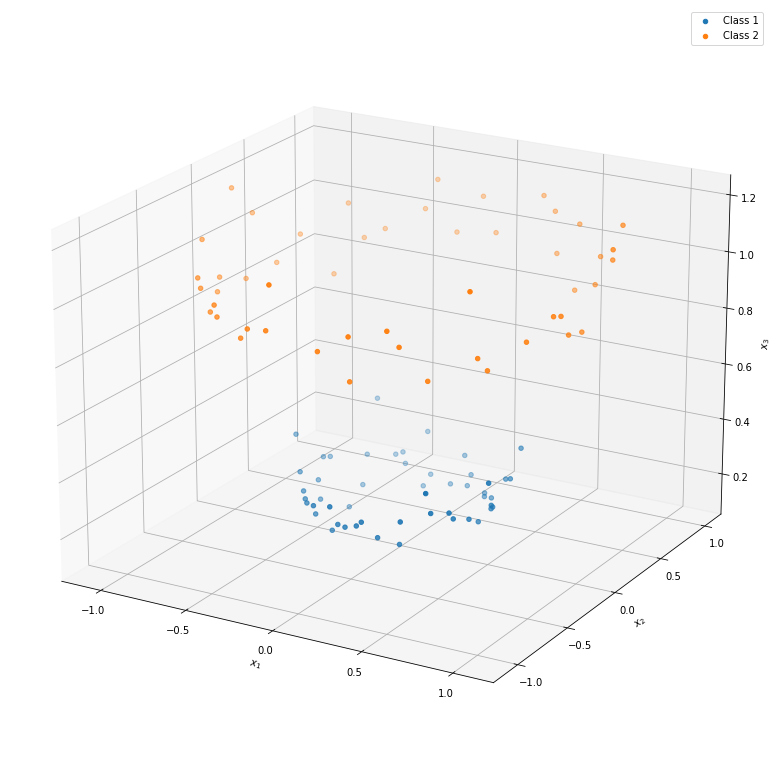

In [6]:
from mpl_toolkits.mplot3d import Axes3D
x_3 = np.sum(X**2, axis=1) # The new dimension that we add to make the problem easier to solve
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw={"projection": "3d"})
ax.scatter(X[y, 0], X[y, 1], x_3[y], label="Class 1")
ax.scatter(X[not_y, 0], X[not_y, 1], x_3[not_y], label="Class 2")
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$x_3$')
_ = ax.view_init(elev=20.)
_ = ax.legend()

Thanks to the new dimension, a linear horizontal plane is now sufficient to separate the two classes. In practice, finding a good mapping may be difficult. Nonetheless, the premise of the kernel based methods is finding such a mapping without a need to explicitly defining it.

In addition to Gaussian processes for machine learning, the following list contains a selection of furhter kernel-based methods:
- support-vector machines (SVM),
- kernel principal component analysis (kernel PCA)
- kernel ridge regression